In [ ]:
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


<bound method Figure.show of <Figure size 2000x2000 with 16 Axes>>

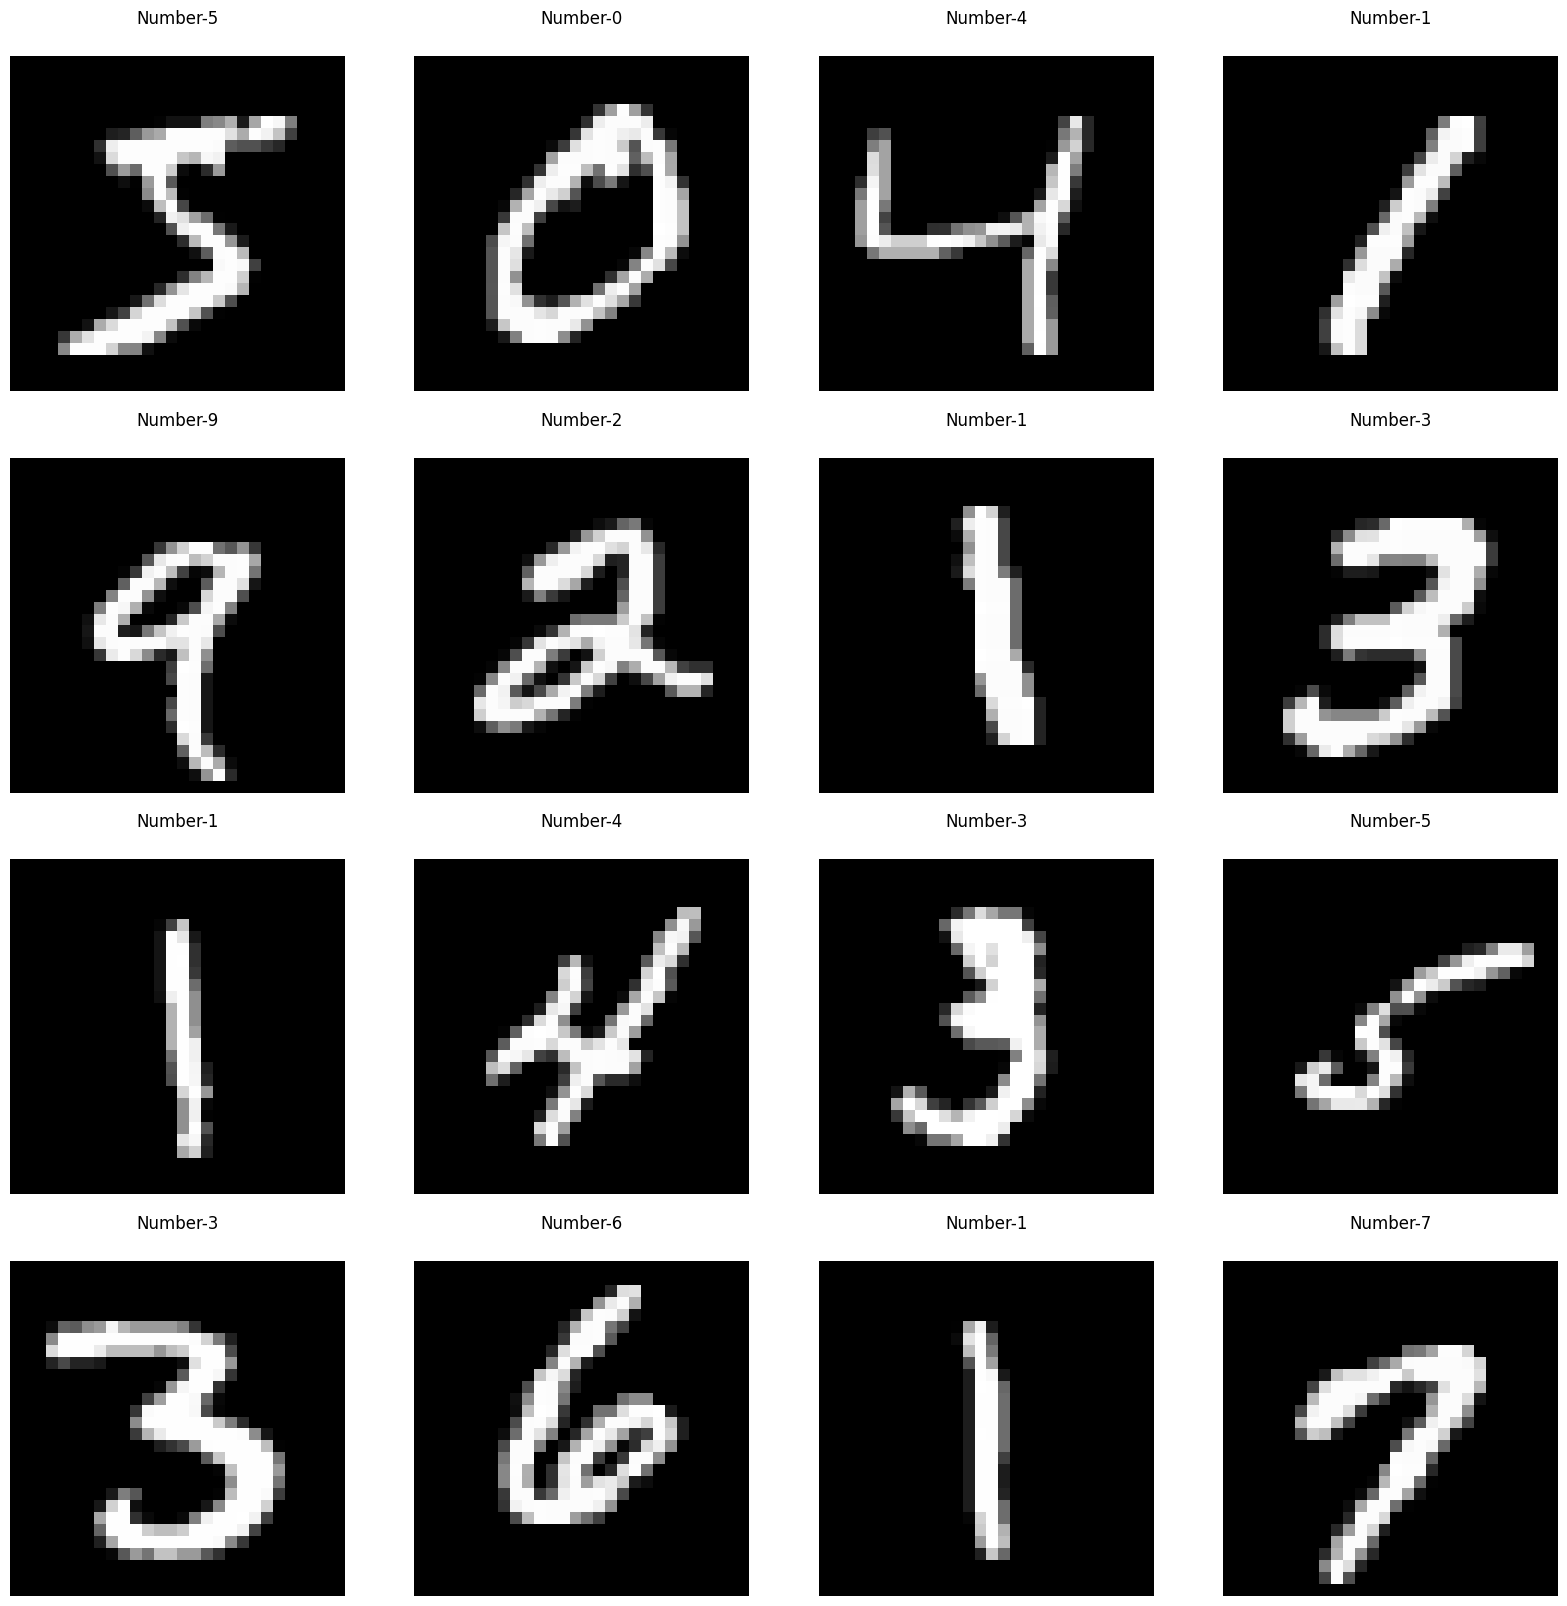

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(4, 4, figsize = (20,20))
plt.gray()
for i, ax in enumerate(axes.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number-{}'.format(y_train[i]))
fig.show

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train_shape : ',x_train.shape)

print('Number of image inside X Train', x_train.shape[0])

print('Number of image inside X Test', x_test.shape[0])

x_train_shape :  (60000, 28, 28, 1)
Number of image inside X Train 60000
Number of image inside X Test 10000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2064 - accuracy: 0.9377
Epoch 2/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0837 - accuracy: 0.9745
Epoch 3/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0577 - accuracy: 0.9824


In [ ]:
pred = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0581 - accuracy: 0.9816


<bound method Figure.show of <Figure size 2000x2000 with 16 Axes>>

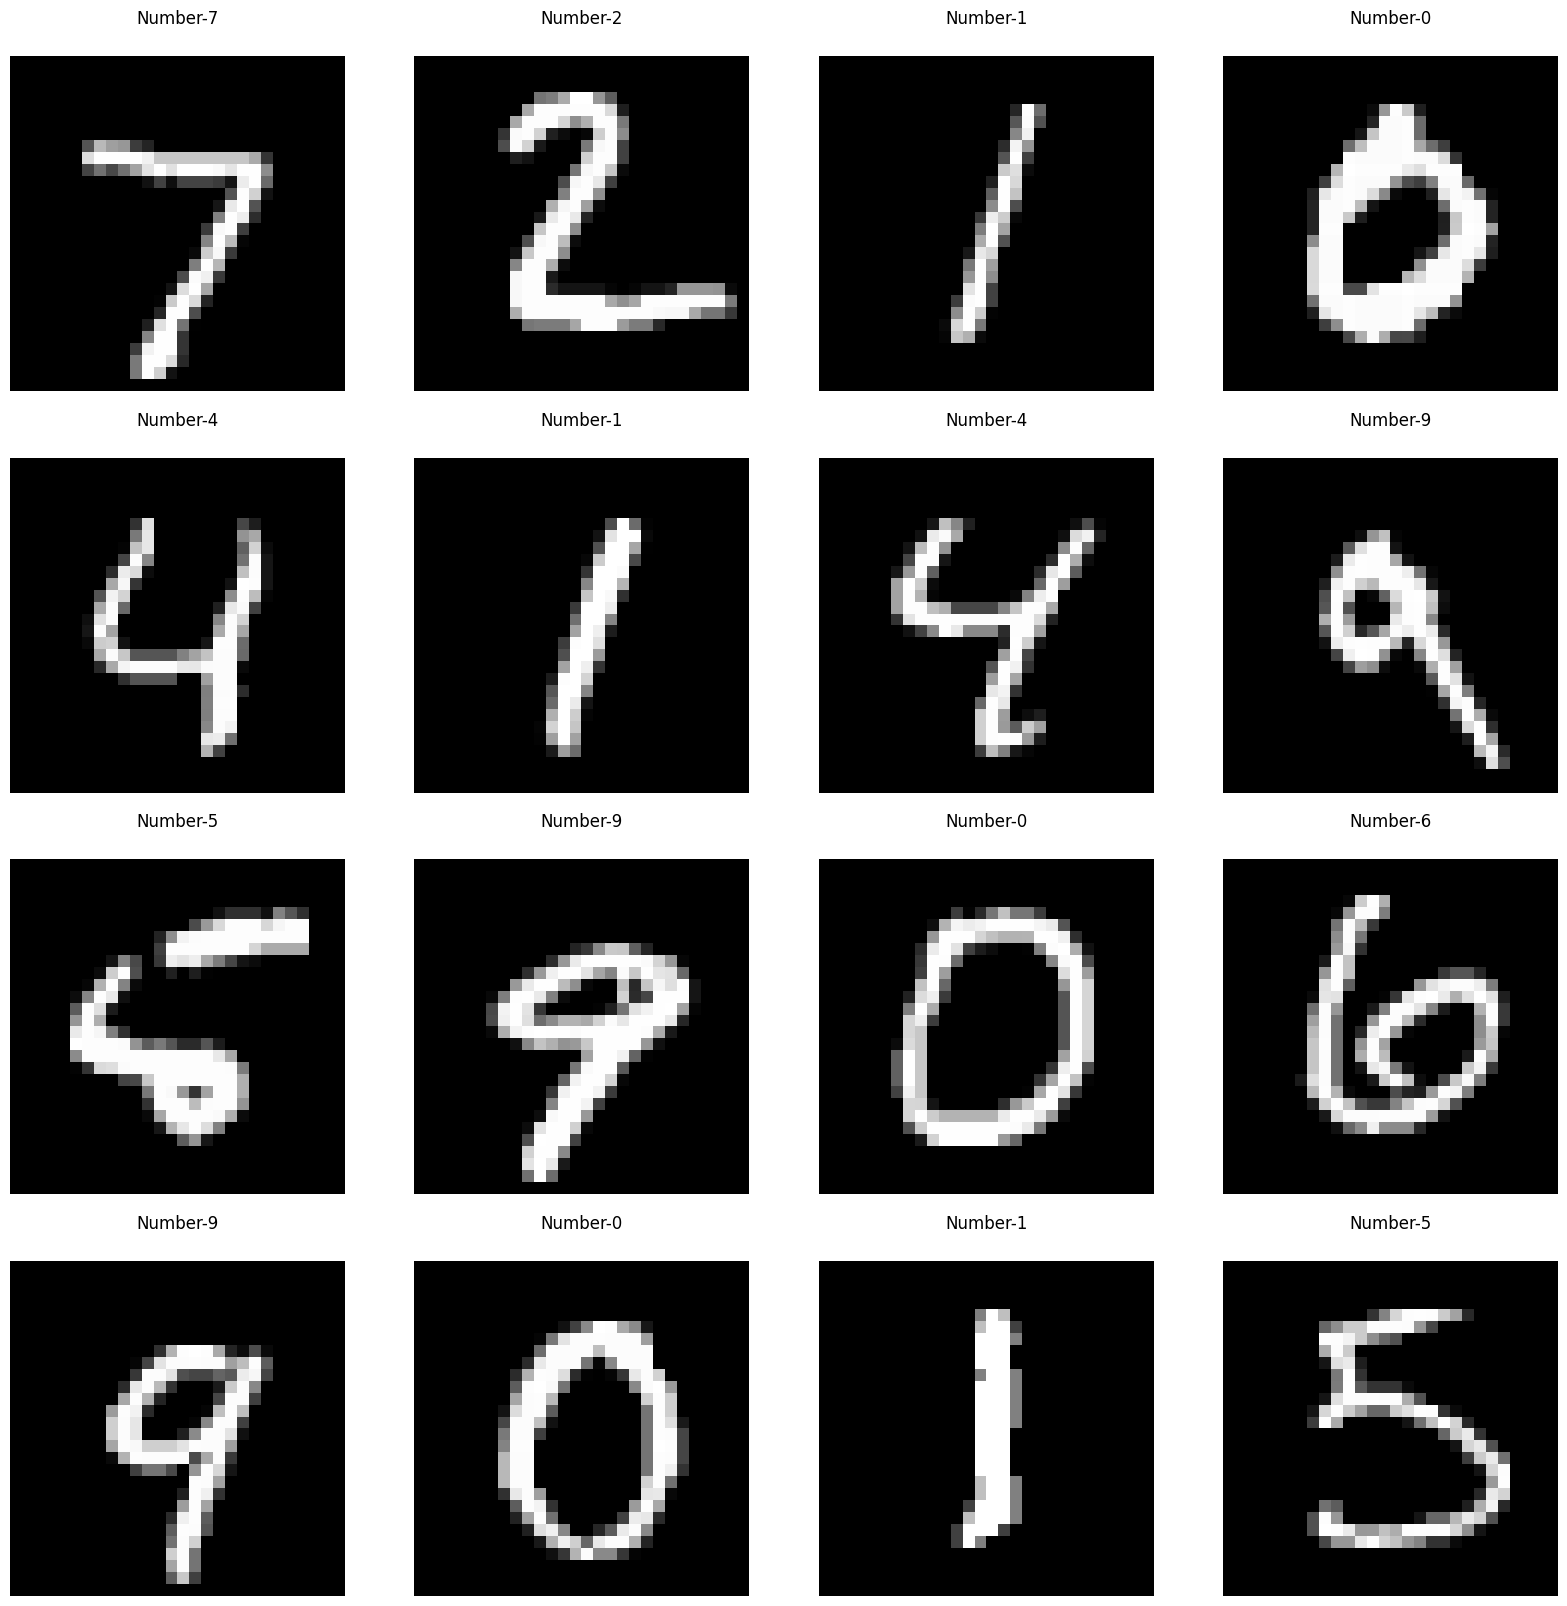

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(4, 4, figsize = (20,20))
plt.gray()
for i, ax in enumerate(axes.flat):
    ax.matshow(x_test[i])
    ax.axis('off')
    ax.set_title('Number-{}'.format(y_test[i]))
fig.show

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
pred = model.evaluate(x_test, y_test)
y_pred = np.argmax(model.predict(x_test), axis=-1)
print("Test accuracy :", pred[1])
print(classification_report(y_test, y_pred))


313/313 [==============================] - 2s 6ms/step
Test accuracy : 0.9815999865531921
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.96      0.99      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

